<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import re
import glob
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## GPU Configuration

In [18]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


# TensorFlow GPU memory configuration
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Found GPU at: /device:GPU:0


## Create Corpus From Data

In [2]:
folder_path = '/content/drive/MyDrive/fairybook/'
file_paths=glob.glob(folder_path+'*.csv') # list of file_paths
dfs = [pd.read_csv(file_path) for file_path in file_paths] # list of dfs
df = pd.concat(dfs, ignore_index=True)
corpus = [text.lower() for text in df['text']] # list of sentences

## Tokenizer

In [7]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'to': 3, 'a': 4, 'of': 5, 'was': 6, 'he': 7, 'it': 8, 'in': 9, 'i': 10, 'she': 11, 'that': 12, 'her': 13, 'you': 14, 'but': 15, 'had': 16, 'his': 17, 'for': 18, 'they': 19, 'as': 20, 'with': 21, 'said': 22, "'": 23, 'not': 24, 'at': 25, 'so': 26, 'on': 27, 'is': 28, 'all': 29, 'have': 30, 'him': 31, 'be': 32, 'my': 33, 'one': 34, 'then': 35, 'when': 36, 'there': 37, 'up': 38, 'out': 39, 'little': 40, 'me': 41, 'into': 42, 'were': 43, 'will': 44, 'them': 45, 'old': 46, 'what': 47, 'very': 48, 'this': 49, 'which': 50, 'from': 51, 'who': 52, 'could': 53, 'came': 54, 'by': 55, 'no': 56, 'do': 57, 'if': 58, 'been': 59, 'down': 60, 'went': 61, 'their': 62, 'now': 63, 'did': 64, 'time': 65, 'are': 66, 'would': 67, 'we': 68, 'away': 69, 'go': 70, 'well': 71, 'how': 72, 'mother': 73, 'an': 74, 'only': 75, 'upon': 76, 'man': 77, 'must': 78, 'back': 79, 'good': 80, 'where': 81, 'about': 82, 'shall': 83, 'your': 84, 'over': 85, 'day': 86, 'more': 87, 'again': 88, 'some': 89, '

## Get Input Sequences

In [8]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
input_sequences

array([[   0,    0,    0, ...,    0,    1,  702],
       [   0,    0,    0, ...,    1,  702,    6],
       [   0,    0,    0, ...,  702,    6,    9],
       ...,
       [   0,    0,    0, ...,    6,  111, 2120],
       [   0,    0,    0, ...,  111, 2120,  168],
       [   0,    0,    0, ..., 2120,  168,   87]], dtype=int32)

In [10]:
xs

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  702],
       [   0,    0,    0, ...,    1,  702,    6],
       ...,
       [   0,    0,    0, ...,  572,    6,  111],
       [   0,    0,    0, ...,    6,  111, 2120],
       [   0,    0,    0, ...,  111, 2120,  168]], dtype=int32)

In [11]:
labels

array([ 702,    6,    9, ..., 2120,  168,   87], dtype=int32)

In [12]:
ys[1][:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'a': 4, 'of': 5, 'was': 6, 'he': 7, 'it': 8, 'in': 9, 'i': 10, 'she': 11, 'that': 12, 'her': 13, 'you': 14, 'but': 15, 'had': 16, 'his': 17, 'for': 18, 'they': 19, 'as': 20, 'with': 21, 'said': 22, "'": 23, 'not': 24, 'at': 25, 'so': 26, 'on': 27, 'is': 28, 'all': 29, 'have': 30, 'him': 31, 'be': 32, 'my': 33, 'one': 34, 'then': 35, 'when': 36, 'there': 37, 'up': 38, 'out': 39, 'little': 40, 'me': 41, 'into': 42, 'were': 43, 'will': 44, 'them': 45, 'old': 46, 'what': 47, 'very': 48, 'this': 49, 'which': 50, 'from': 51, 'who': 52, 'could': 53, 'came': 54, 'by': 55, 'no': 56, 'do': 57, 'if': 58, 'been': 59, 'down': 60, 'went': 61, 'their': 62, 'now': 63, 'did': 64, 'time': 65, 'are': 66, 'would': 67, 'we': 68, 'away': 69, 'go': 70, 'well': 71, 'how': 72, 'mother': 73, 'an': 74, 'only': 75, 'upon': 76, 'man': 77, 'must': 78, 'back': 79, 'good': 80, 'where': 81, 'about': 82, 'shall': 83, 'your': 84, 'over': 85, 'day': 86, 'more': 87, 'again': 88, 'some': 89, '

## Model Training

In [31]:
model = Sequential()
model.add(Embedding(total_words, 75, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
2116/2116 - 124s - loss: 5.9965 - accuracy: 0.1130 - val_loss: 6.1084 - val_accuracy: 0.1117 - 124s/epoch - 59ms/step
Epoch 2/100
2116/2116 - 80s - loss: 5.1936 - accuracy: 0.1523 - val_loss: 6.2111 - val_accuracy: 0.1255 - 80s/epoch - 38ms/step
Epoch 3/100
2116/2116 - 75s - loss: 4.8772 - accuracy: 0.1680 - val_loss: 6.4865 - val_accuracy: 0.1220 - 75s/epoch - 35ms/step
Epoch 4/100
2116/2116 - 73s - loss: 4.3628 - accuracy: 0.1862 - val_loss: 6.7815 - val_accuracy: 0.1207 - 73s/epoch - 34ms/step
Epoch 5/100
2116/2116 - 76s - loss: 4.0874 - accuracy: 0.2024 - val_loss: 7.0833 - val_accuracy: 0.1165 - 76s/epoch - 36ms/step
Epoch 6/100
2116/2116 - 72s - loss: 3.8909 - accuracy: 0.2190 - val_loss: 7.4327 - val_accuracy: 0.1159 - 72s/epoch - 34ms/step
Epoch 7/100
2116/2116 - 74s - loss: 3.7472 - accuracy: 0.2318 - val_loss: 7.7326 - val_accuracy: 0.1112 - 74s/epoch - 35ms/step
Epoch 8/100
2116/2116 - 75s - loss: 3.6500 - accuracy: 0.2402 - val_loss: 8.0173 - val_accuracy: 0.107

## Model Evaluation

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 402, 75)           474450    
                                                                 
 bidirectional_6 (Bidirecti  (None, 300)               271200    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 6326)              1904126   
                                                                 
Total params: 2649776 (10.11 MB)
Trainable params: 2649776 (10.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


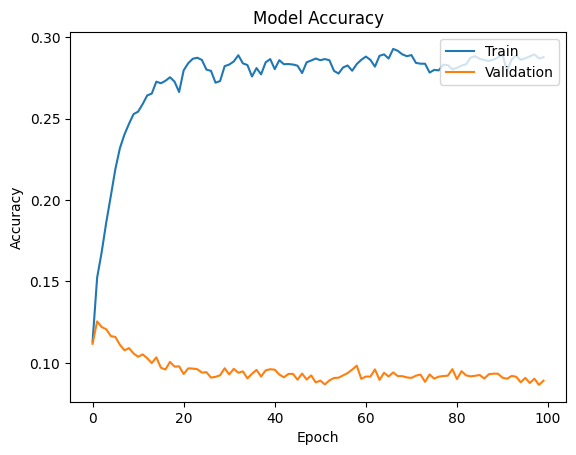

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Save Model Artifacts

In [40]:
# Save the history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
print(model)

In [45]:
#save model
model.save('FairyTaleProject.keras')

In [53]:
# Save the tokenizer 
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

## Text Generation

In [50]:
seed_text = "a long time ago in a galaxy far far away"
next_words = 30

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 45ms/step
a long time ago in a galaxy far far away the amusements but the old willow waved until the old woman was awaiting him up christian a little then condemned them to pluck the butter and the smaller ones to
